In [44]:
import cv2 as cv
import numpy as np
import os
import random
import string

from random import randint
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt
from skimage import filters

In [45]:
LETTER_IMG_DIM_X = 64
LETTER_IMG_DIM_Y = 80
LETTER_IMG_SHAPE = (LETTER_IMG_DIM_Y, LETTER_IMG_DIM_X)

THRESHOLD_MIN = 10
THRESHOLD_MAX = 255

MAX_SHIFT = 3
FONT_SIZES = [80, 85, 90, 95, 100]
FONT_SIZE_LOCATIONS = [(11, -3), (11, -5), (10, -7), (9, -9), (7, -12)]
THRESHOLDS = [1, 64, 128]

In [50]:
letter = 'Q'
font_size = 90
blank_letter_color = Image.new('RGB', (200, 200), ())
draw = ImageDraw.Draw(blank_letter_color)
monospace = ImageFont.truetype("UbuntuMono-R.ttf", font_size)
draw.text(blank_letter_color, letter, fill=(0,0,255), font=monospace)
letter_img = np.array(blank_letter_color)
plt.imshow(letter_img)

TypeError: 'Image' object is not subscriptable

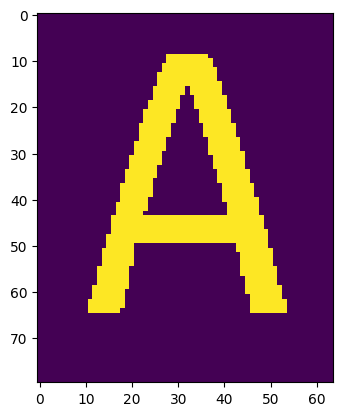

In [39]:
letter = 'A'
blank_letter = np.zeros(LETTER_IMG_SHAPE, dtype=np.uint8)
blank_letter_pil = Image.fromarray(blank_letter)
# Get a drawing context
draw = ImageDraw.Draw(blank_letter_pil)
font_size = 90
font_location = (10, -10)
# Replace
monospace = ImageFont.truetype("UbuntuMono-R.ttf", font_size)
draw.text(font_location, letter, fill=255, font=monospace)
# Convert back to OpenCV image and save
letter_img = np.array(blank_letter_pil)
letter_img_thresh = cv.inRange(letter_img, 128, 255)
plt.imshow(letter_img_thresh)

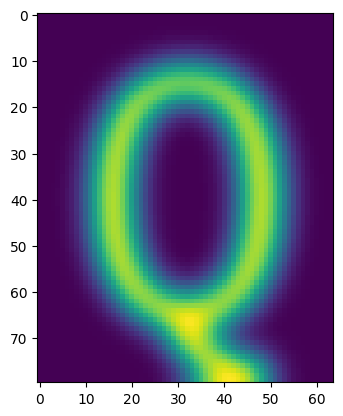

In [37]:
letter_img_blur = cv.GaussianBlur(letter_img, (21, 21), sigmaX=0)
plt.imshow(letter_img_blur)

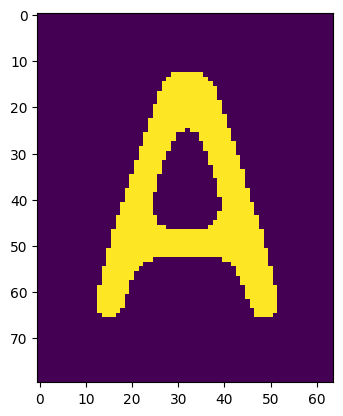

In [20]:
letter_img_blur_thresh = cv.inRange(letter_img_blur, 128, 255)
plt.imshow(letter_img_blur_thresh)

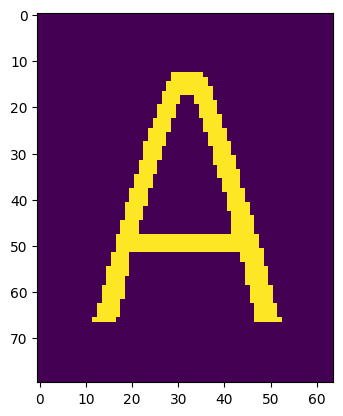

In [31]:
erosion_kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3)) # can do MORPH_RECT, MORPH_ELLIPSE, MORPH_CROSS
letter_img_erode = cv.erode(letter_img_thresh, erosion_kernel)
plt.imshow(letter_img_erode)

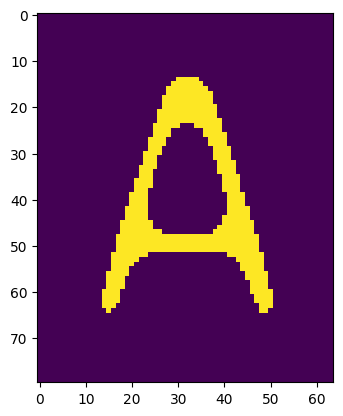

In [35]:
erosion_kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
letter_img_blur_erode = cv.erode(letter_img_blur_thresh, erosion_kernel)
plt.imshow(letter_img_blur_erode)

### Explanation of training data


In [ ]:
# Delete the 'train-letters' directory before running.

os.mkdir('train-letters/')
for i in range(26):
    letter = chr(ord('A') + i)
    os.mkdir('train-letters/' + str(i))
    for j in range(len(FONT_SIZES)):
        # Demonstration: generate ideal letter templates (font size 90, place (10, -7))
        blank_letter = np.zeros(LETTER_IMG_SHAPE, dtype=np.uint8)
        blank_letter_pil = Image.fromarray(blank_letter)
        # Get a drawing context
        draw = ImageDraw.Draw(blank_letter_pil)
        font_size = FONT_SIZES[j]
        font_location = FONT_SIZE_LOCATIONS[j]
        monospace = ImageFont.truetype("UbuntuMono-R.ttf", 
                                        font_size)
        draw.text(font_location, letter, fill=255, font=monospace)
        # Convert back to OpenCV image and save
        letter_img = np.array(blank_letter_pil)
        letter_img_thresh = cv.inRange(letter_img, 64, 255)
        cv.imwrite(os.path.join("train-letters", str(i), f"{letter}_{font_size}.png"), letter_img_thresh)